In [5]:
from pathlib import Path
import torch
from torch import nn
from torch.nn import functional as nnf
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import dvs
from dvs import plots
from dvs.plots import plt_utils
from dvs.utils import notebook_utils
%load_ext autoreload
%autoreload 2
mpl.rcParams['figure.dpi'] = 300
assert mpl.rcParams['font.family'][0] == 'sans-serif' and mpl.rcParams['font.sans-serif'][0] == 'Arial'

# b - Connectivity between identified cell types

In [6]:
nnv = dvs.analysis.NetworkViews("flow/0092/000")

## matrix

### logarithmic

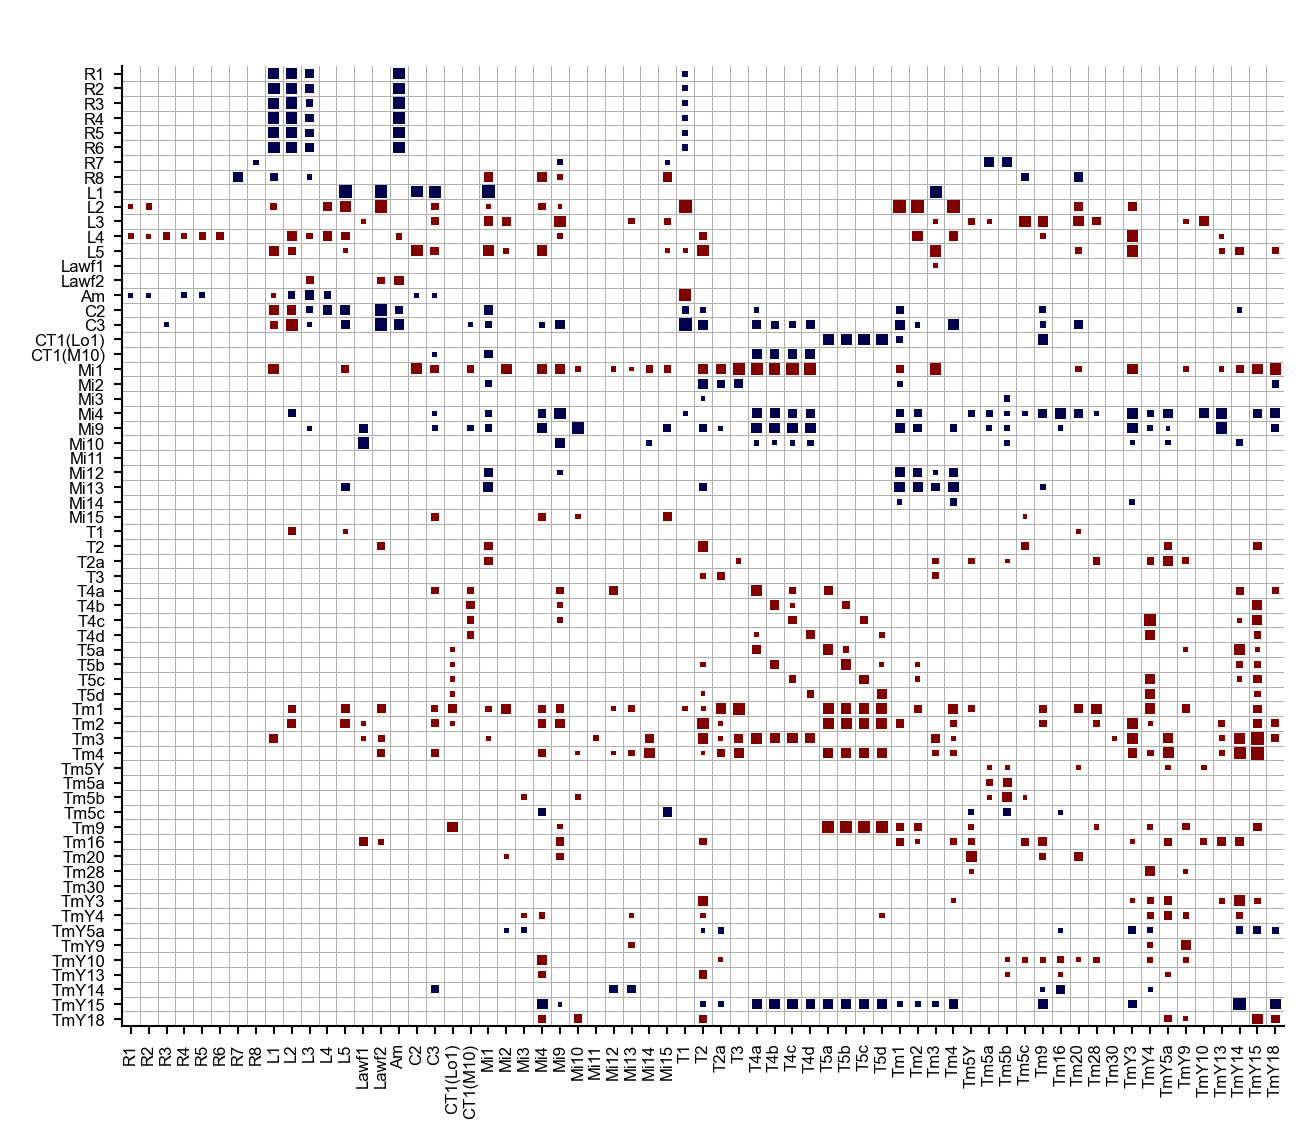

In [43]:
# def log_sizes(values):
#     return 2 * np.log(np.abs(values) + 1)

# fig, ax, cbar, matrix, = nnv.connectivity_matrix("n_syn", figsize=[5, 4], 
#                         fontsize=4, title=" ", cb_label=" ", size_scale=1, 
#                                                  size_transform=log_sizes, 
#                         cbar=False, vmin=-0.0001, vmax=0.0001, cbar_fontsize=8,
#                         grid_linewidth=0.25)
# ax.tick_params(length=2, pad=2)
# # cbar.ax.yaxis.get_major_formatter().labelOnlyBase = False
# # cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# # ax.yaxis.grid(False, 'both')
# # dvs.plots.rm_spines(ax, ('left', ))

# dvs.plots.patch_type_texts(ax)
# # plt.savefig(dvs.figure_01_fly_visual_system / "cell_type_connectivity.pdf", transparent=True)

### linear sizes

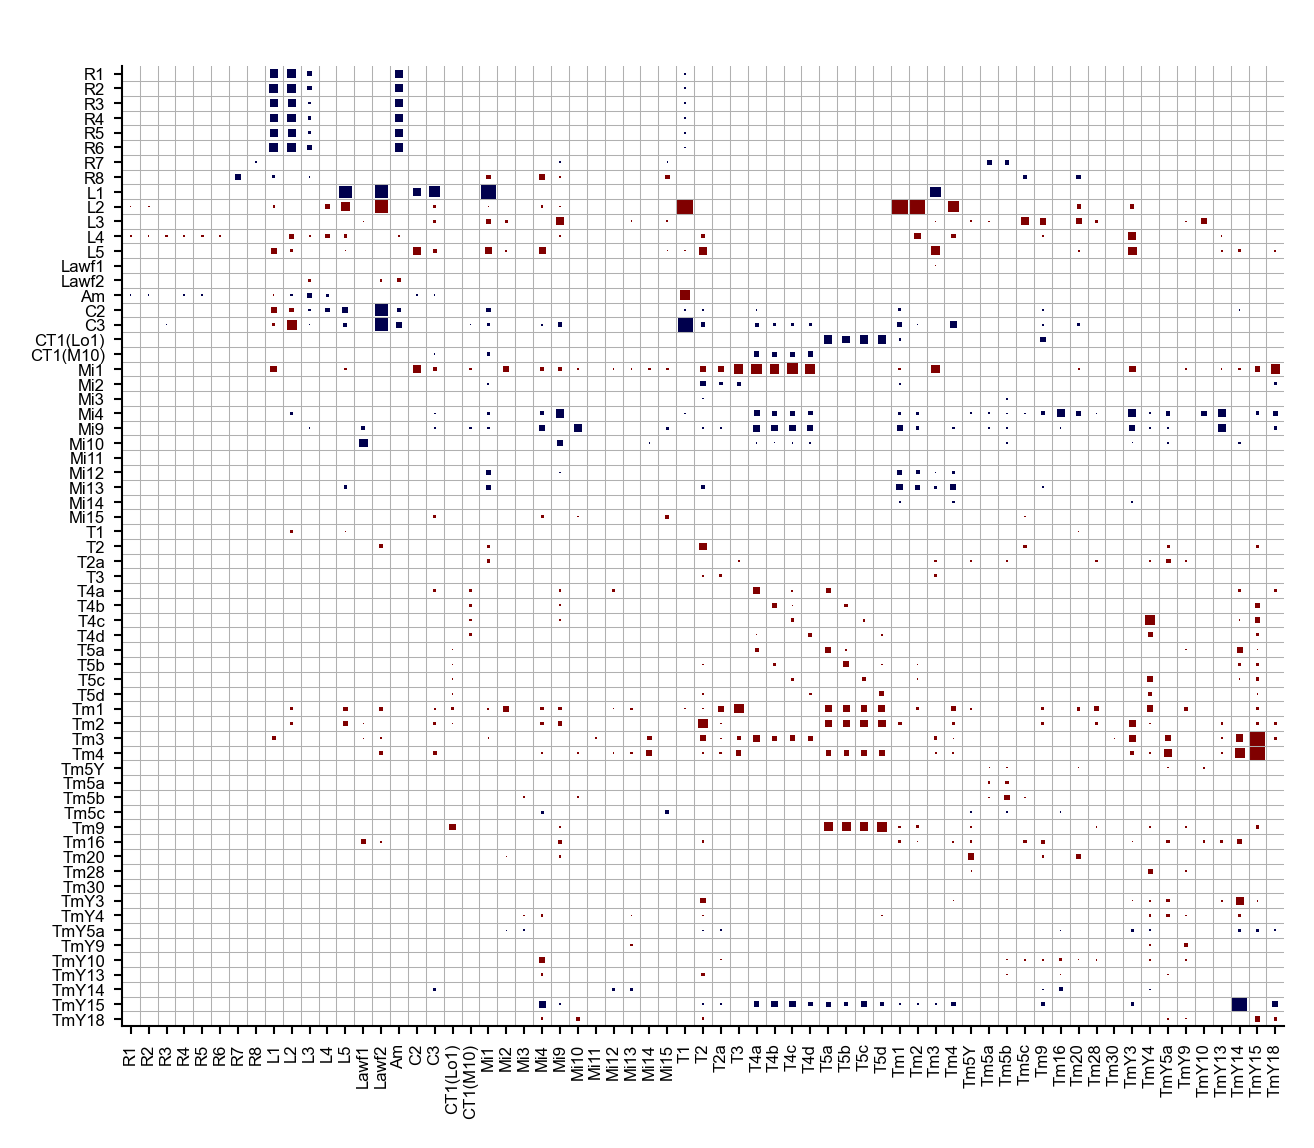

In [16]:
fig, ax, cbar, matrix, = nnv.connectivity_matrix("n_syn", figsize=[5, 4], 
                        fontsize=4, title=" ", cb_label=" ", size_scale=0.1, 
                        cbar=False, vmin=-0.0001, vmax=0.0001, cbar_fontsize=8,
                        grid_linewidth=0.25)
ax.tick_params(length=2, pad=2)
# cbar.ax.yaxis.get_major_formatter().labelOnlyBase = False
# cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# ax.yaxis.grid(False, 'both')
# dvs.plots.rm_spines(ax, ('left', ))

dvs.plots.patch_type_texts(ax)
# plt.savefig(dvs.figure_01_fly_visual_system / "cell_type_connectivity.pdf", transparent=True)

### grouped

easier manually in illustrator

In [26]:
groups = ["R", "L", "Lawf", "Am", "C", "CT1", "Mi", "T", "Tm", "TmY"]

## synapse count legend - vertical

In [2]:
hist, syn_counts = np.histogram(matrix[matrix<0], bins=3)

NameError: name 'matrix' is not defined

In [32]:
points = syn_counts[:-1] - (syn_counts[:-1] - syn_counts[1:]) / 2

In [33]:
cmap = plt.cm.seismic
norm = dvs.plots.get_norm(vmin=-0.0001, vmax=0.0001, midpoint=0)

In [34]:
x=np.zeros(len(points))
y=np.arange(len(points))* 0.5

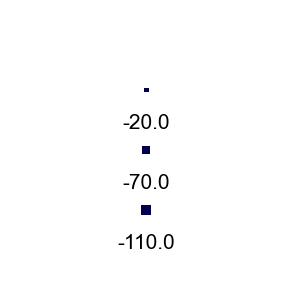

In [9]:
fig, ax = dvs.plots.init_plot(figsize=[1, 1])
ax.scatter(x=x, 
           y=y,
           s=0.05 * np.abs(points),
           c=points,
           cmap=cmap,
           norm=norm,
           marker='s',
          edgecolors='none')
# ax.set_aspect('equal')
dvs.plots.rm_spines(ax)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, max(y)+0.5)
for i, c in enumerate(points):
    ax.annotate(np.round(c, -1), (x[i], y[i] - 0.2), va='top', ha='center', fontsize=5, transform=ax.transData)
    
plt.savefig(dvs.figure_01_fly_visual_system / "cm_box_legend_neg.pdf", transparent=True, bbox_inches="tight")

In [10]:
hist, syn_counts = np.histogram(matrix[matrix>0], bins=3)

In [11]:
points = syn_counts[:-1] - (syn_counts[:-1] - syn_counts[1:]) / 2

In [12]:
cmap = plt.cm.seismic
norm = dvs.plots.get_norm(vmin=-0.0001, vmax=0.0001, midpoint=0)

In [13]:
x=np.zeros(len(points))
y=np.arange(len(points))*0.5

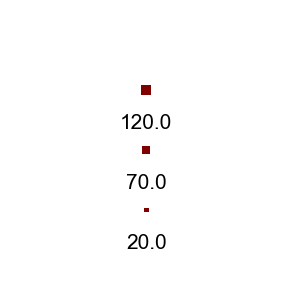

In [14]:
fig, ax = dvs.plots.init_plot(figsize=[1, 1])
ax.scatter(x=x, 
           y=y,
           s=0.05 * np.abs(points),
           c=points,
           cmap=cmap,
           norm=norm,
           marker='s',
          edgecolor='none')
# ax.set_aspect('equal')
dvs.plots.rm_spines(ax)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, max(y)+0.5)
for i, c in enumerate(points):
    ax.annotate(np.round(c, -1), (x[i], y[i] - 0.2), va='top', ha='center', fontsize=5, transform=ax.transData)
    
plt.savefig(dvs.figure_01_fly_visual_system / "cm_box_legend_pos.pdf", transparent=True, bbox_inches="tight")

# c - convolutional filters

## close up with annotations

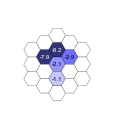

In [170]:
nnv.receptive_field(source="Mi9", target="T4d", annotate=True,
                    annotate_coords=False, trained=False,
                    n_syn=True, cbar=False, fontsize=6, vmax=14,
                    figsize=[2, 2], title="", max_extent=2, edgewidth=0.2)
plt.savefig(dvs.figure_01_fly_visual_system / "rf_mi9->t4d.pdf", bbox_inches="tight", transparent=True)

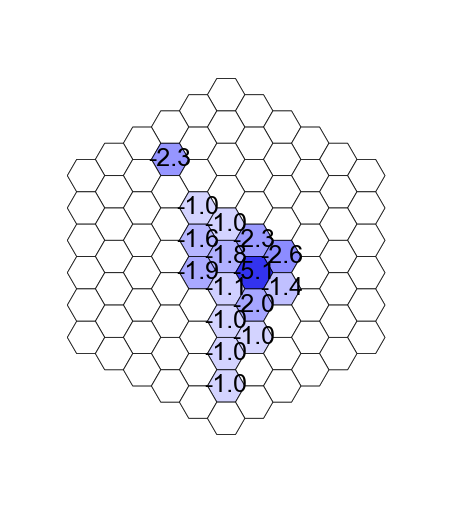

In [24]:
nnv.receptive_field(source="Mi9", target="T4a", annotate=True,
                    annotate_coords=False, trained=False,
                    n_syn=True, cbar=False, fontsize=6, vmax=14,
                    figsize=[2, 2], title="", max_extent=5, edgewidth=0.2)
plt.savefig(dvs.figure_01_fly_visual_system / "rf_mi9->t4a.pdf", bbox_inches="tight", transparent=True)

### close up without annotations

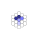

In [4]:
nnv.receptive_field(source="Mi9", target="T4d", annotate=False,
                    annotate_coords=False, trained=False,
                    n_syn=True, cbar=False, fontsize=6, vmax=14,
                    figsize=[0.5, 0.5], title="", max_extent=2, edgewidth=0.1)
plt.savefig(dvs.figure_01_fly_visual_system / "rf_mi9->t4d_no_annotation.pdf", bbox_inches="tight", transparent=True)

$$\sigma_{t_it_j}N_{t_it_j\Delta u\Delta v}$$

$$\sigma_{\text{T4d},\text{Mi9}}N_{\text{T4d},\text{Mi9}\Delta u\Delta v}$$

$$\ast$$

### home column

In [5]:
home_column_color = "#f07d22"

In [15]:
cmap = dvs.utils.color_utils.single_color_cmap(home_column_color)

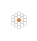

In [20]:
u, v = dvs.utils.get_hex_coords(2)
x = np.ones_like(u) * np.nan
x[(u==0) & (v == 0)] = 1
dvs.plots.hex_scatter(u, v, x, cmap=cmap, cbar=False, edgewidth=0.1, edgecolor="k", figsize=[0.5, 0.5])
plt.savefig(dvs.figure_01_fly_visual_system / "rf_mi9->t4d_home_column.pdf", bbox_inches="tight", transparent=True)

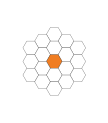

In [21]:
u, v = dvs.utils.get_hex_coords(2)
x = np.ones_like(u) * np.nan
x[(u==0) & (v == 0)] = 1
dvs.plots.hex_scatter(u, v, x, cmap=cmap, cbar=False, edgewidth=0.2, edgecolor="k", figsize=[2, 2])
plt.savefig(dvs.figure_01_fly_visual_system / "rf_mi9->t4d_home_column_large.pdf", bbox_inches="tight", transparent=True)

## full hex lattice schematic

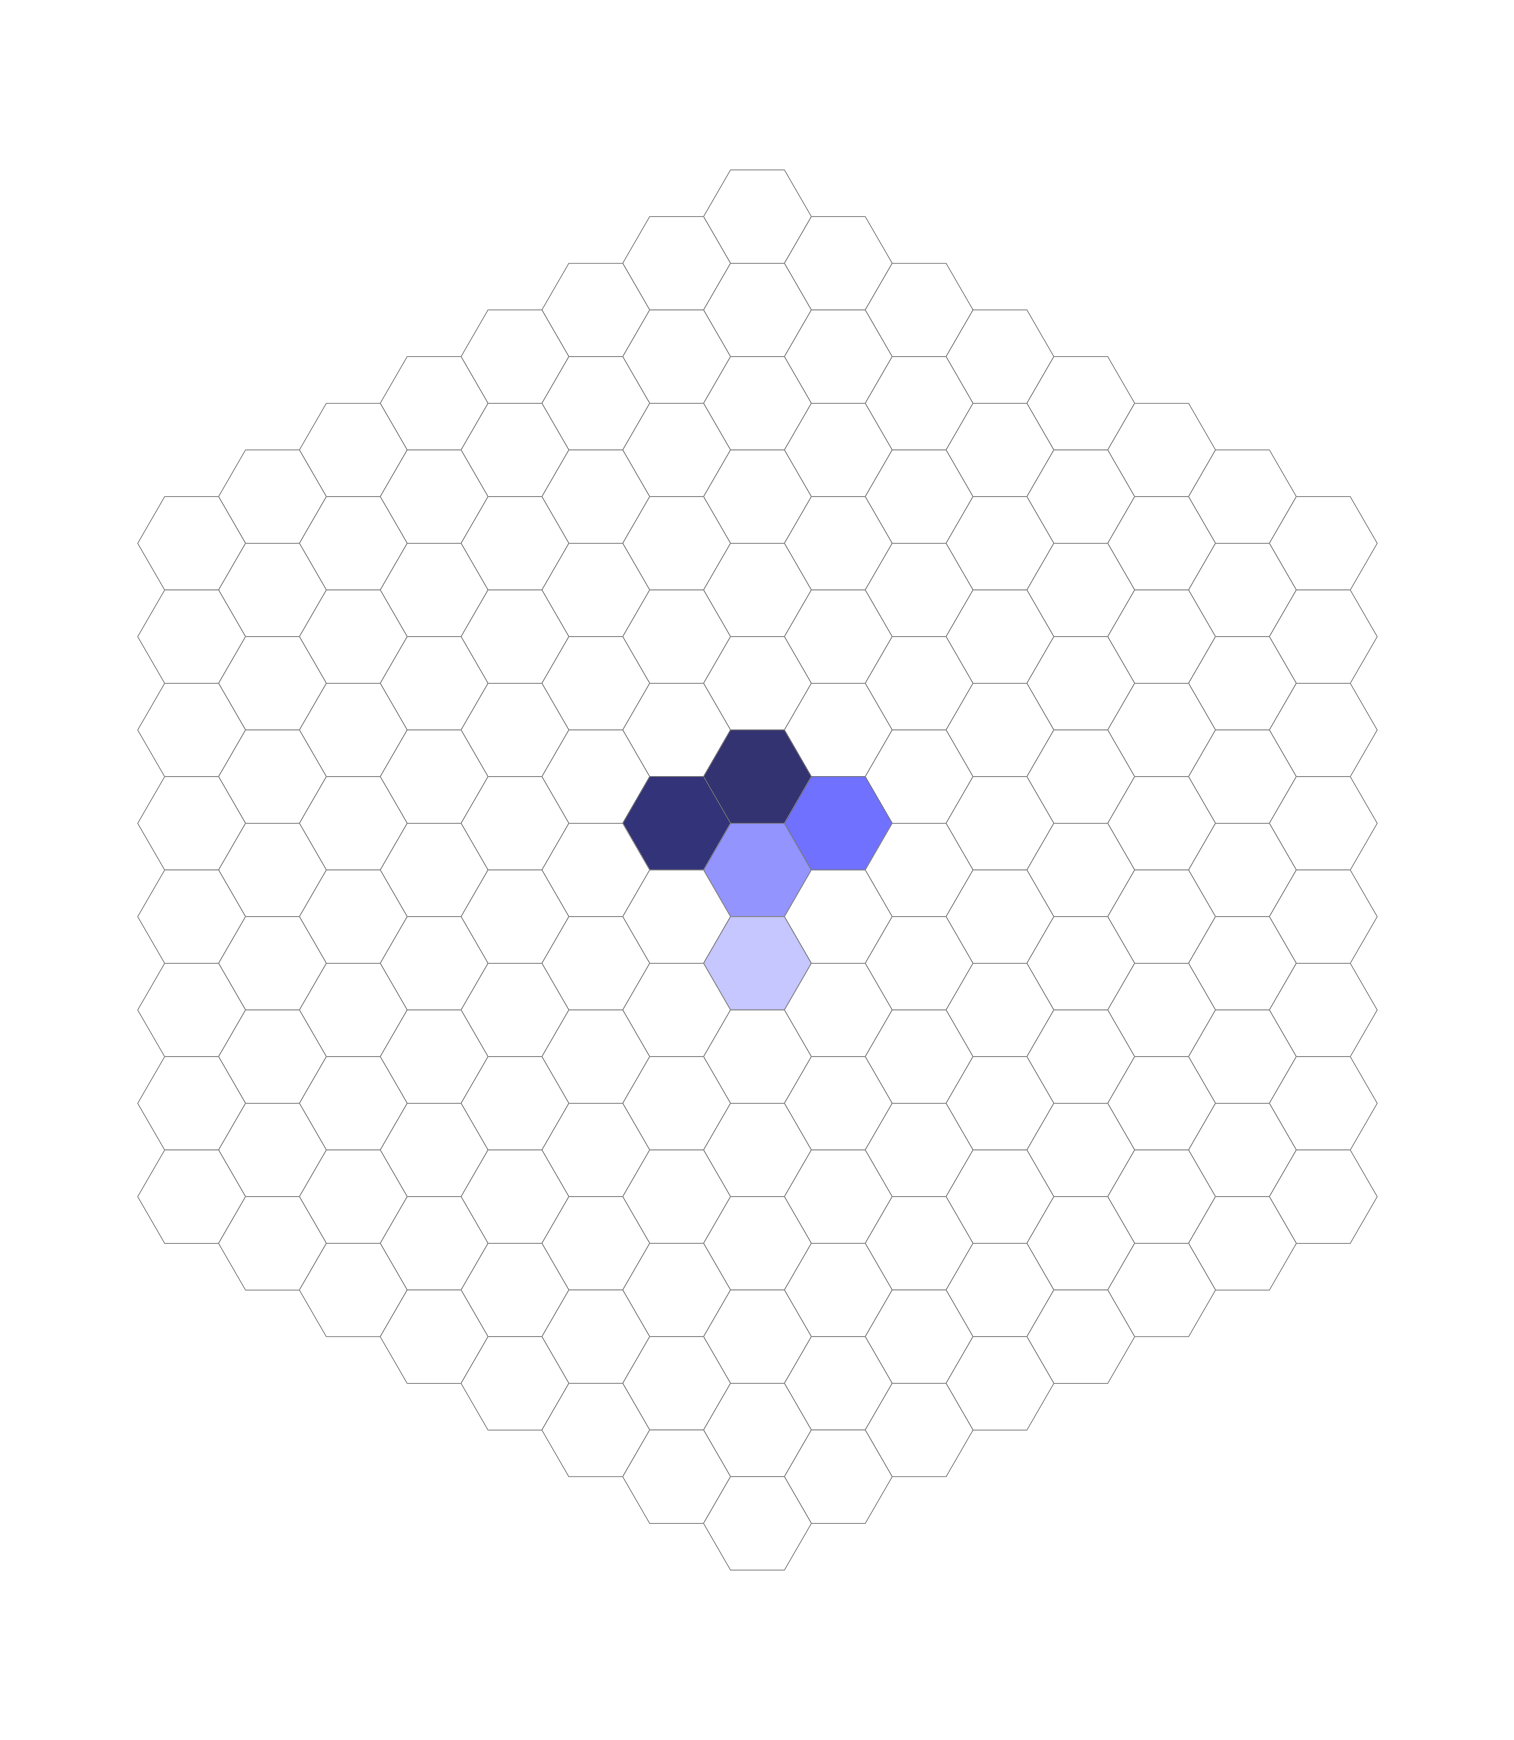

In [57]:
fig, ax, _ = nnv.receptive_field(source="Mi9", target="T4d", annotate=False,
                    annotate_coords=False, trained=False,
                    n_syn=True, cbar=False, 
                    figsize=[7, 7], title="", vmax=14,
                    max_extent=7, edgewidth=0.2, edgecolor="0.5")
fig.savefig(dvs.figure_01_fly_visual_system / "hexlattice_with_filter.pdf", transparent=True, bbox_inches='tight')

# d - retinotopic hexagonal lattice columnar organization

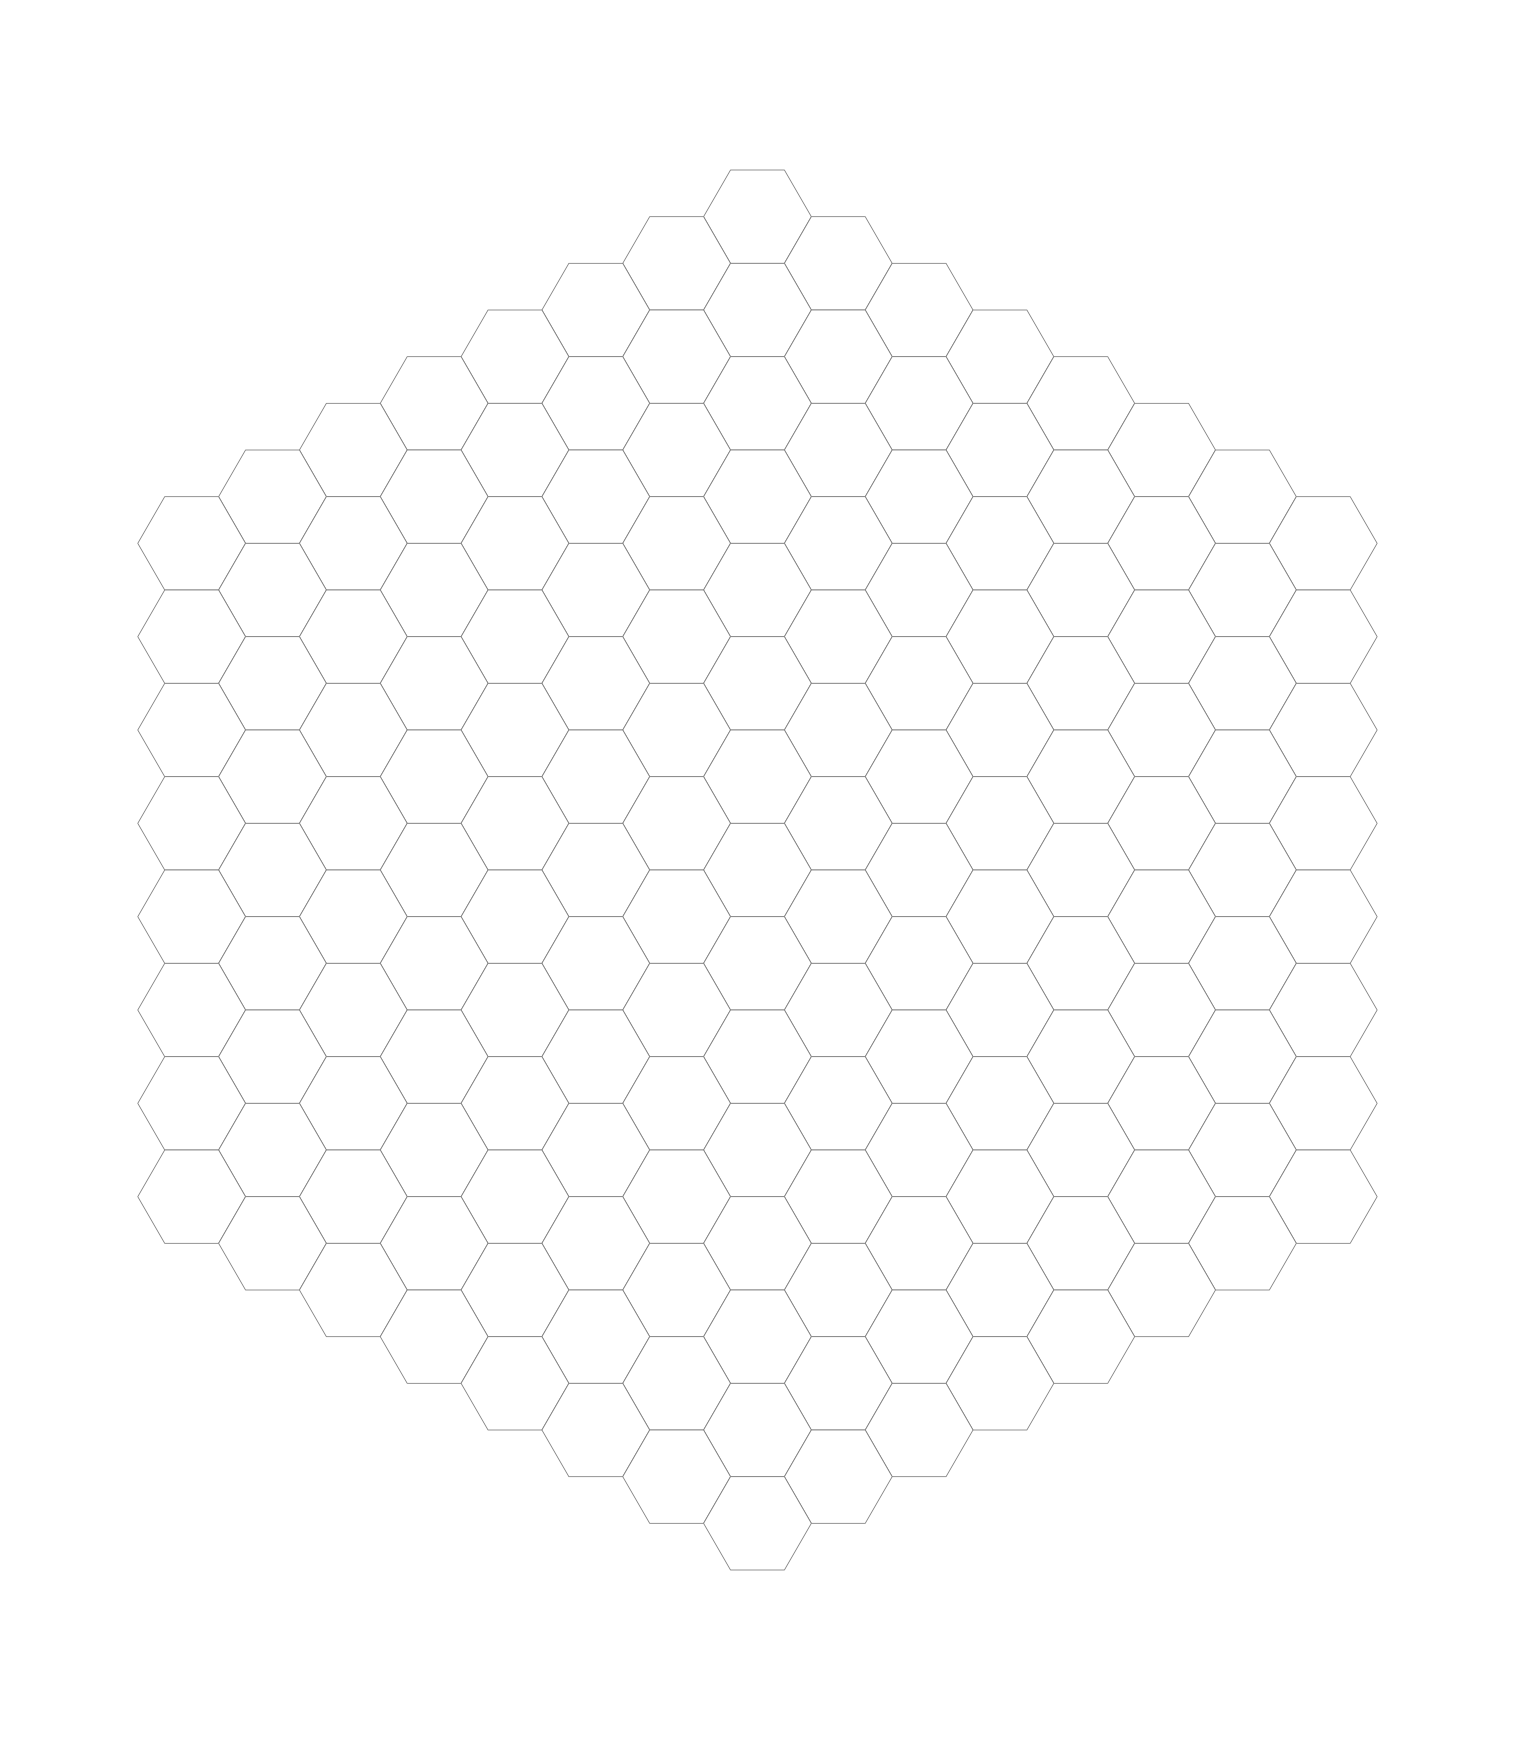

In [60]:
dvs.plots.hex_cs(extent=7, annotate_coords=False, edgewidth=0.2, edgecolor='0.5')
fig.savefig(dvs.figure_01_fly_visual_system / "hexlattice.pdf", transparent=True, bbox_inches='tight')

# f - connectome, task, and single cell dynamics constrained model of the fruit fly visual system

## input

In [156]:
from dvs.transforms.cartesian import vsplit

In [161]:
data = dvs.datasets.MultiTaskSintel()

In [165]:
img = data._get_cartesian_img(0)

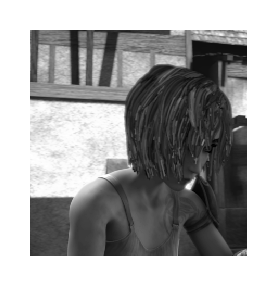

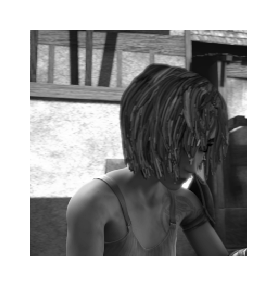

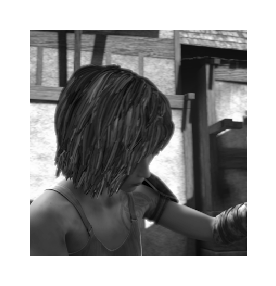

In [166]:
for frame in [0, 1, 19]:
    fig, ax = plt.subplots(figsize=[1, 1])
    ax.imshow(img[1, frame], cmap=plt.cm.binary_r)
    dvs.plots.plt_utils.rm_spines(ax, ['left', 'right', 'top', 'bottom'], rm_yticks=True, rm_xticks=True)
    plt.savefig(dvs.figure_01_fly_visual_system / f"input_{frame}_cartesian.pdf", dpi=300, bbox_inches="tight", transparent=True)

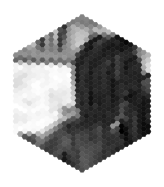

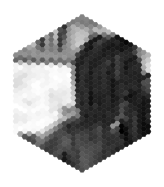

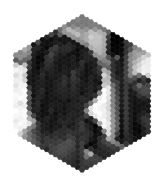

In [167]:
%matplotlib inline
for frame in [0, 1, -1]:
    dvs.plots.quick_hex_scatter(nnv.tnn.training.x[:][batch_sample][frame].squeeze(), figsize=[3, 3], cbar=False)
    plt.savefig(dvs.figure_01_fly_visual_system / f"input_{frame}.pdf", bbox_inches="tight", transparent=True)

## activations

In [7]:
frame = -1
batch_sample = 1 
layout = {'R1': 'retina',
         'R2': 'retina',
         'R3': 'retina',
         'R4': 'retina',
         'R5': 'retina',
         'R6': 'retina',
         'R7': 'retina',
         'R8': 'retina',
         'L1': 'intermediate',
         'L2': 'intermediate',
         'L3': 'intermediate',
         'L4': 'intermediate',
         'L5': 'intermediate',
         'Lawf1': 'intermediate',
         'Lawf2': 'intermediate',
         'Am': 'intermediate',
         'C2': 'intermediate',
         'C3': 'intermediate',
         'CT1Lo1': 'intermediate',
         'CT1M10': 'intermediate',
         'Mi1': 'intermediate',
         'Mi2': 'intermediate',
         'Mi3': 'intermediate',
         'Mi4': 'intermediate',
         'Mi9': 'intermediate',
         'Mi10': 'intermediate',
         'Mi11': 'intermediate',
         'Mi12': 'intermediate',
         'Mi13': 'intermediate',
         'Mi14': 'intermediate',
         'Mi15': 'intermediate',
         'T4a': 'output',
         'T4b': 'output',
         'T4c': 'output',
         'T4d': 'output',
         'T1': 'output',
         'T2': 'output',
         'T2a': 'output',
         'T3': 'output',
         'T5a': 'output',
         'T5b': 'output',
         'T5c': 'output',
         'T5d': 'output',
         'Tm1': 'output',
         'Tm2': 'output',
         'Tm3': 'output',
         'Tm4': 'output',
         'Tm5Y': 'output',
         'Tm5a': 'output',
         'Tm5b': 'output',
         'Tm5c': 'output',
         'Tm9': 'output',
         'Tm16': 'output',
         'Tm20': 'output',
         'Tm28': 'output',
         'Tm30': 'output',
         'TmY3': 'output',
         'TmY4': 'output',
         'TmY5a': 'output',
         'TmY9': 'output',
         'TmY10': 'output',
         'TmY13': 'output',
         'TmY14': 'output',
         'TmY15': 'output',
         'TmY17': 'output'}

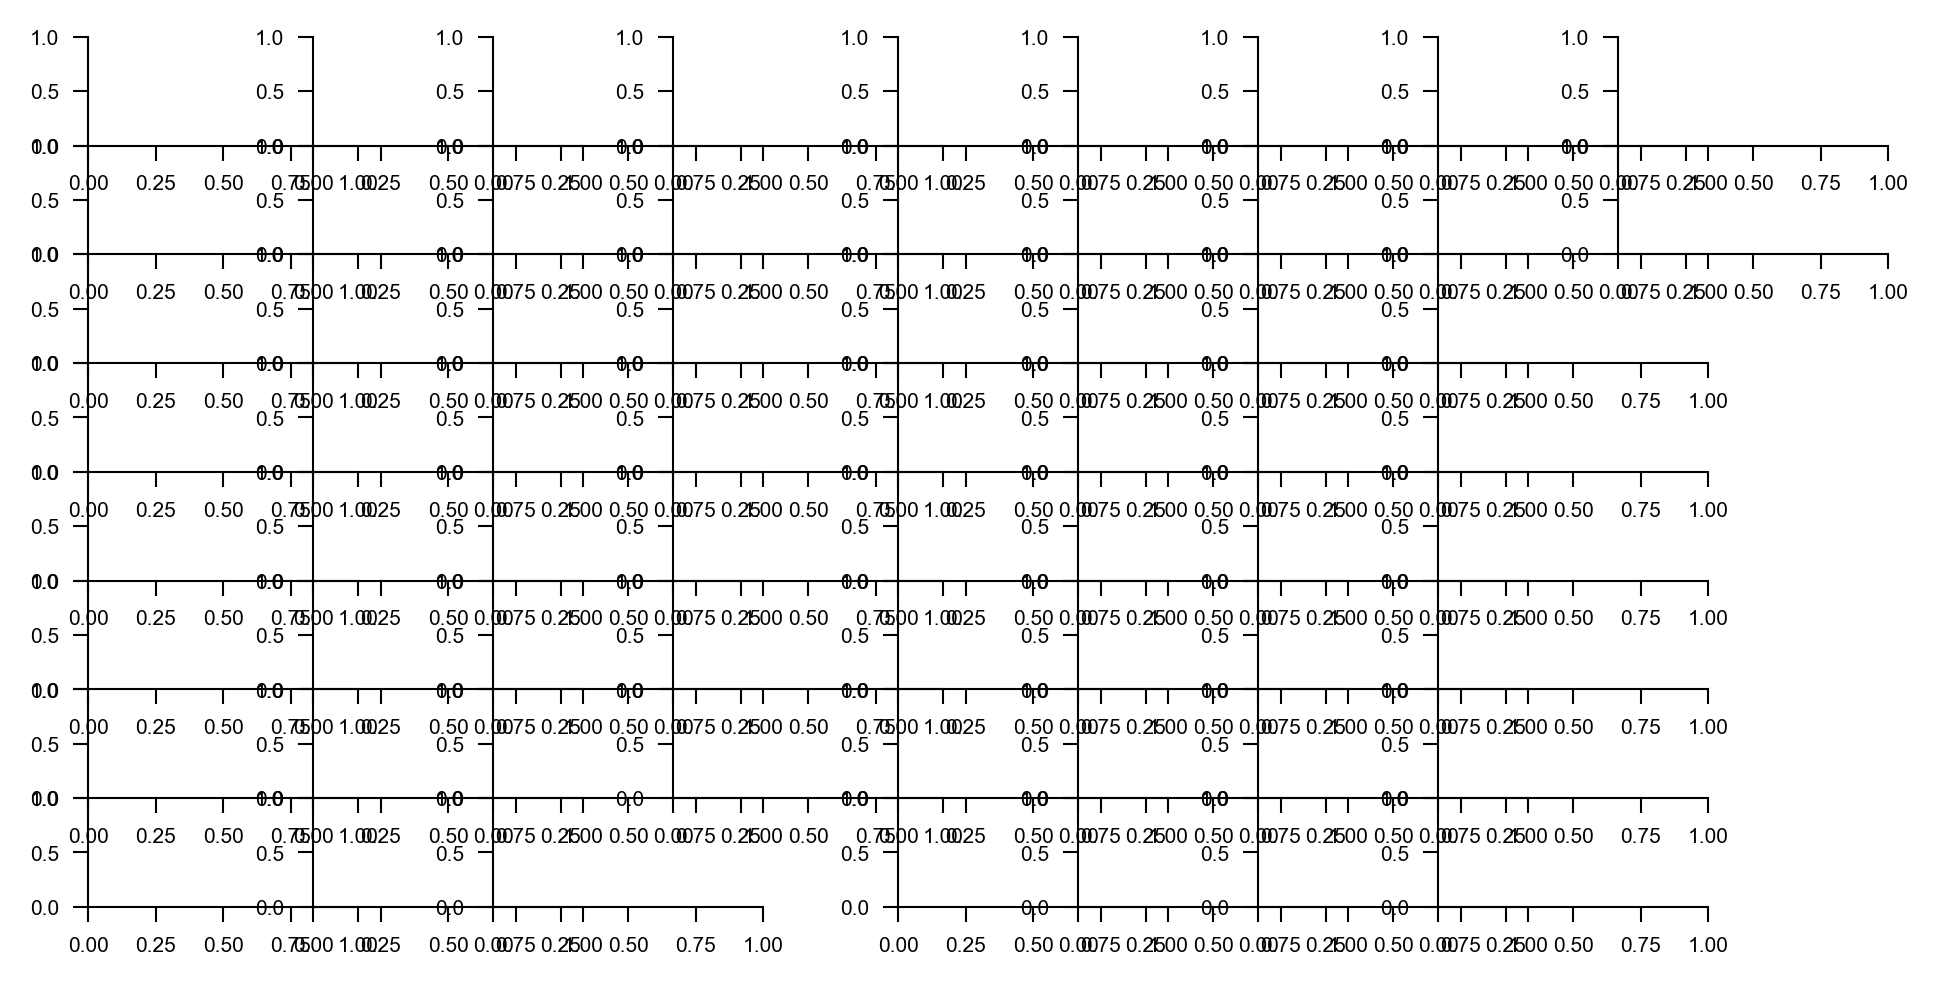

In [9]:
nodes = nnv.nodes.to_df()
edges = nnv.edges.to_df()

fig, axes = dvs.plots.plots._network_graph_ax_scatter(list(layout.keys()), 
                                                                 nodes,
                                                                 edges,
                                                                 layout, 
                                                                 figsize=(6., 2.9),
                                                             edge_color_key=None, # "weight_prior"
                                                    edge_alpha=0.1,
                                                    edge_width=0.2,
                                                    region_spacing=1.25, wspace=-0.5)

In [81]:
from flyvision.plots.network import WholeNetworkFigure, network_layout_axes, _network_graph_node_pos

In [83]:
_network_graph_node_pos(update_layout, types_per_column=4)

{'R1': [0, 3],
 'R2': [0, 2],
 'R3': [0, 1],
 'R4': [0, 0],
 'R5': [1, 3],
 'R6': [1, 2],
 'R7': [1, 1],
 'R8': [1, 0],
 'L1': [3, 3],
 'L2': [3, 2],
 'L3': [3, 1],
 'L4': [3, 0],
 'L5': [4, 3],
 'Lawf1': [4, 2],
 'Lawf2': [4, 1],
 'Am': [4, 0],
 'C2': [5, 3],
 'C3': [5, 2],
 'CT1(Lo1)': [5, 1],
 'CT1(M10)': [5, 0],
 'Mi1': [6, 3],
 'Mi2': [6, 2],
 'Mi3': [6, 1],
 'Mi4': [6, 0],
 'Mi9': [7, 3],
 'Mi10': [7, 2],
 'Mi11': [7, 1],
 'Mi12': [7, 0],
 'Mi13': [8, 3],
 'Mi14': [8, 2],
 'Mi15': [8, 1],
 'T4a': [10, 3],
 'T4b': [10, 2],
 'T4c': [10, 1],
 'T4d': [10, 0],
 'T1': [11, 3],
 'T2': [11, 2],
 'T2a': [11, 1],
 'T3': [11, 0],
 'T5a': [12, 3],
 'T5b': [12, 2],
 'T5c': [12, 1],
 'T5d': [12, 0],
 'Tm1': [13, 3],
 'Tm2': [13, 2],
 'Tm3': [13, 1],
 'Tm4': [13, 0],
 'Tm5Y': [14, 3],
 'Tm5a': [14, 2],
 'Tm5b': [14, 1],
 'Tm5c': [14, 0],
 'Tm9': [15, 3],
 'Tm16': [15, 2],
 'Tm20': [15, 1],
 'Tm28': [15, 0],
 'Tm30': [16, 3],
 'TmY3': [16, 2],
 'TmY4': [16, 1],
 'TmY5a': [16, 0],
 'TmY9': [17, 3

In [27]:
from flyvision.connectome import ConnectomeView, ConnectomeDir

In [28]:
ctome = ConnectomeDir()

In [189]:
from dvs.utils.nodes_edges_utils import original_cell_type, adapted_cell_type

In [148]:
update_layout = {'R1': 'retina',
 'R2': 'retina',
 'R3': 'retina',
 'R4': 'retina',
 'R5': 'retina',
 'R6': 'retina',
 'R7': 'retina',
 'R8': 'retina',
 'L1': 'intermediate',
 'L2': 'intermediate',
 'L3': 'intermediate',
 'L4': 'intermediate',
 'L5': 'intermediate',
 'Lawf1': 'intermediate',
 'Lawf2': 'intermediate',
 'Am': 'intermediate',
 'C2': 'intermediate',
 'C3': 'intermediate',
 'CT1(Lo1)': 'intermediate',
 'CT1(M10)': 'intermediate',
 'Mi1': 'intermediate',
 'Mi2': 'intermediate',
 'Mi3': 'intermediate',
 'Mi4': 'intermediate',
 'Mi9': 'intermediate',
 'Mi10': 'intermediate',
 'Mi11': 'intermediate',
 'Mi12': 'intermediate',
 'Mi13': 'intermediate',
 'Mi14': 'intermediate',
 'Mi15': 'intermediate',
 'T4a': 'output',
 'T4b': 'output',
 'T4c': 'output',
 'T4d': 'output',                 
 'T1': 'output',
 'T2': 'output',
 'T2a': 'output',
 'T3': 'output',
 'T5a': 'output',
 'T5b': 'output',
 'T5c': 'output',
 'T5d': 'output',
 'Tm1': 'output',
 'Tm2': 'output',
 'Tm3': 'output',
 'Tm4': 'output',
 'Tm5Y': 'output',
 'Tm5a': 'output',
 'Tm5b': 'output',
 'Tm5c': 'output',
 'Tm9': 'output',
 'Tm16': 'output',
 'Tm20': 'output',
 'Tm28': 'output',
 'Tm30': 'output',
 'TmY3': 'output',
 'TmY4': 'output',
 'TmY5a': 'output',
 'TmY9': 'output',
 'TmY10': 'output',
 'TmY13': 'output',
 'TmY14': 'output',
 'TmY15': 'output',
 'TmY18': 'output'}

In [79]:
layer_activity = dvs.plots.utils.LayerActivity(nnv.tnn.training_v2.network_states.nodes.activity[:],
                                               nnv.ctome, 
                                               keepref=True)
u, v = dvs.utils.get_hex_coords(15)
nodes = nnv.nodes.to_df()

In [158]:
from flyvision.plots.network import draw_networkx_edges

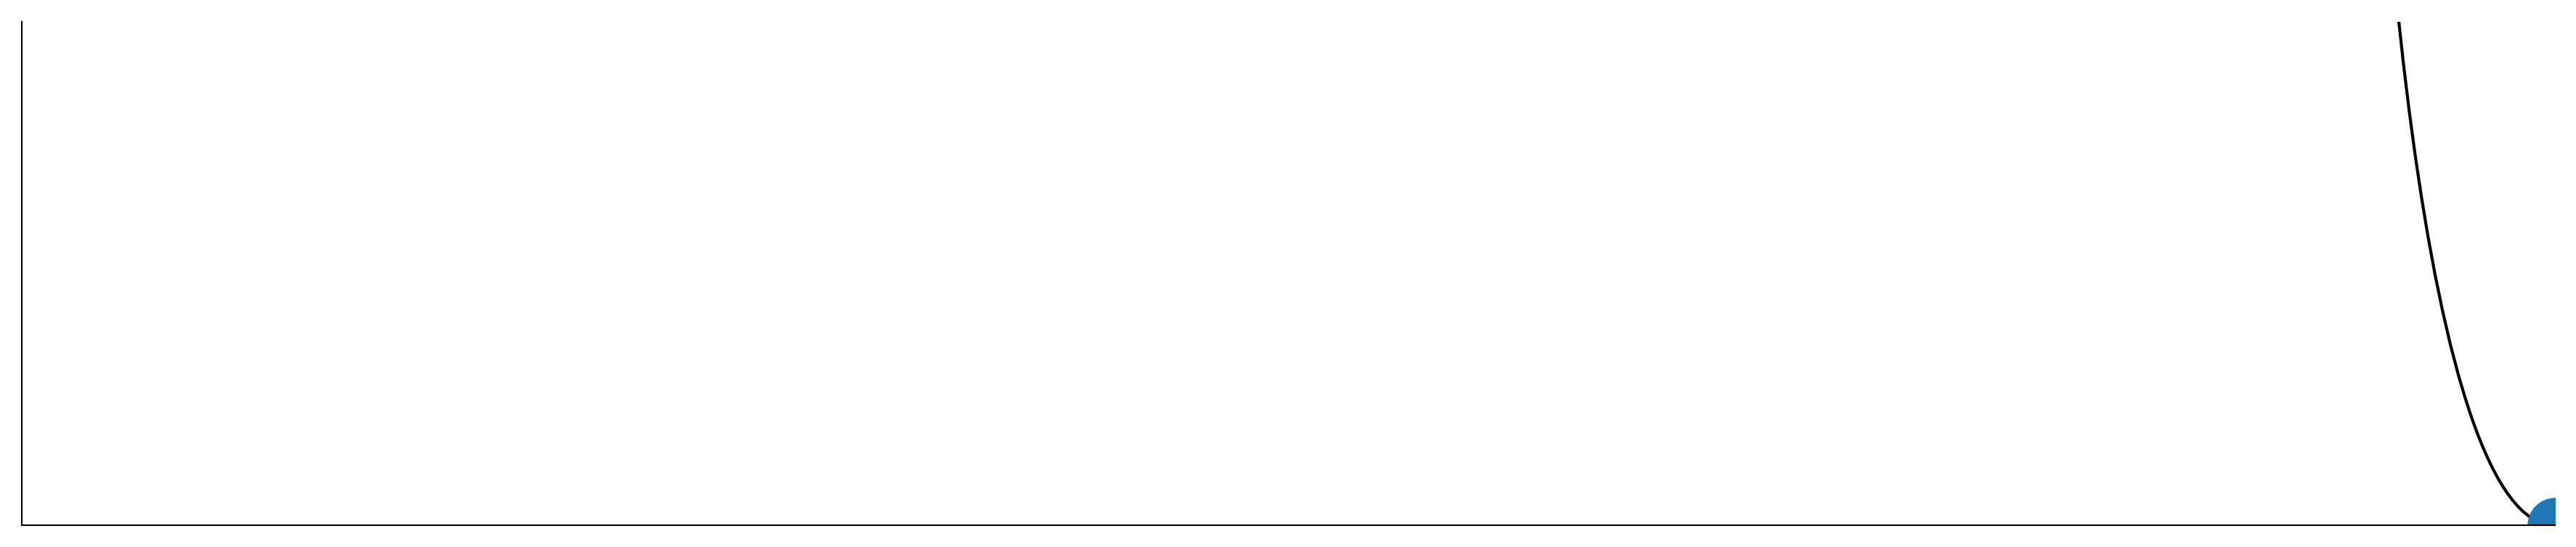

In [174]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[15, 3])
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
G = nx.DiGraph()  # Self-loop at node 0
G.add_nodes_from([0, 1, 2])
G.add_edges_from([(0, 0), (1, 1), (2, 2)])
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos)
edge_collection = draw_networkx_edges(
    G,
    pos=pos,
    ax=ax,
    arrows=True,
    arrowstyle="-|>, head_length=0.4, head_width=0.075, widthA=1.0, widthB=1.0, lengthA=0.2, lengthB=0.2",
    selfloop_h_shift=0.1,
    selfloop_v_shift=5,
)

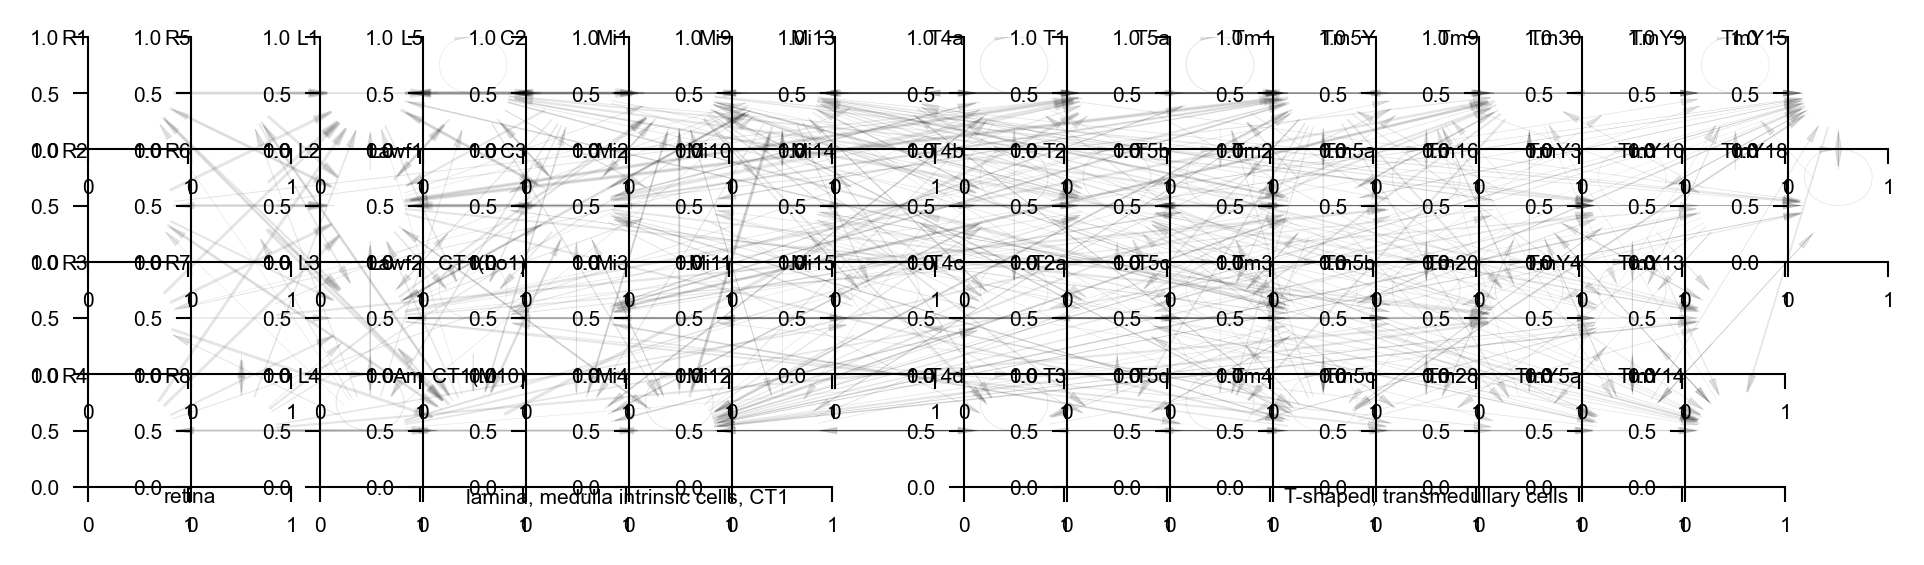

In [176]:
wnf = WholeNetworkFigure(ctome)
wnf.layout = update_layout
wnf.init_figure(
    figsize=(6.0, 1.5),
    decoder_box=False,
    fontsize=5,
    add_graph_kwargs={
        "constant_edge_width": None,
        "edge_width": 0.15, # this scales edges relative to each other
        "constant_edge_color": "k",
        "edge_alpha": 0.1,
        "nx_kwargs": {"min_source_margin": 0,
                      "min_target_margin": 5,
                      "selfloop_x0": 0,
                      "selfloop_y0": 0,
                      "selfloop_h_shift": 0.025,
                      "selfloop_v_shift": 0.125},
    },
    network_layout_axes_kwargs={
        "types_per_column": 4,
        "region_spacing": 1.25,
        "wspace": 0.0,
    },
)
# wnf.edge_ax.set_ylim(0, 1.5)

Text(0.5, 0.5, 'test')

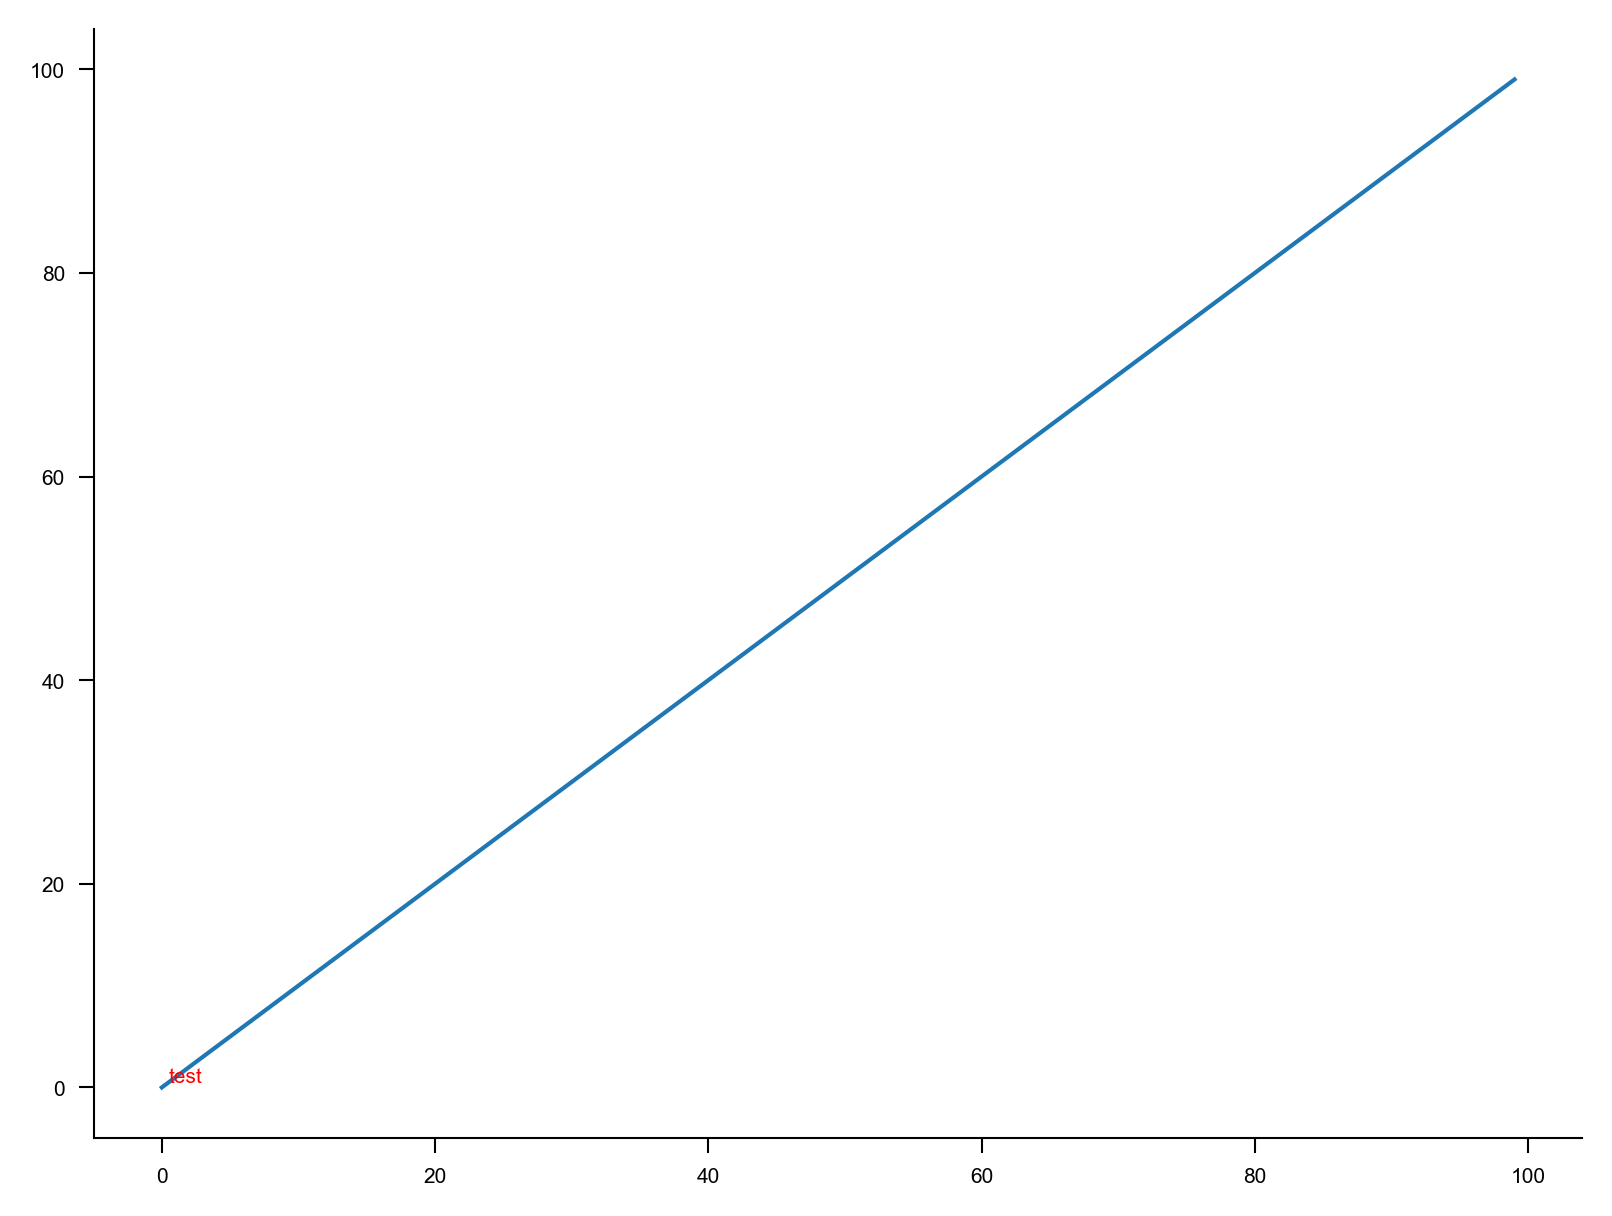

In [197]:
plt.plot(np.arange(100))
ax = plt.gca()
ax.annotate("test", (0.5, 0.5), color="red")

In [181]:
from dvs.utils.color_utils import cell_type_colors

In [185]:
from dvs.plots.decoration import color_label

In [222]:
x = np.random.randn(721)

(<Figure size 300x300 with 2 Axes>,
 <Axes: >,
 (Text(-12.0, 20.784609690826528, 'CT1(M10)'),
  <matplotlib.cm.ScalarMappable at 0x7fa8dd73c6a0>))

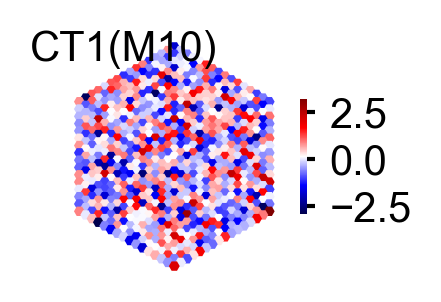

In [230]:
dvs.plots.hex_scatter(u, v, x, label="CT1(M10)", labelxy="auto", figsize=[1, 1])

/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:180: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(new)
/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:187: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(new)


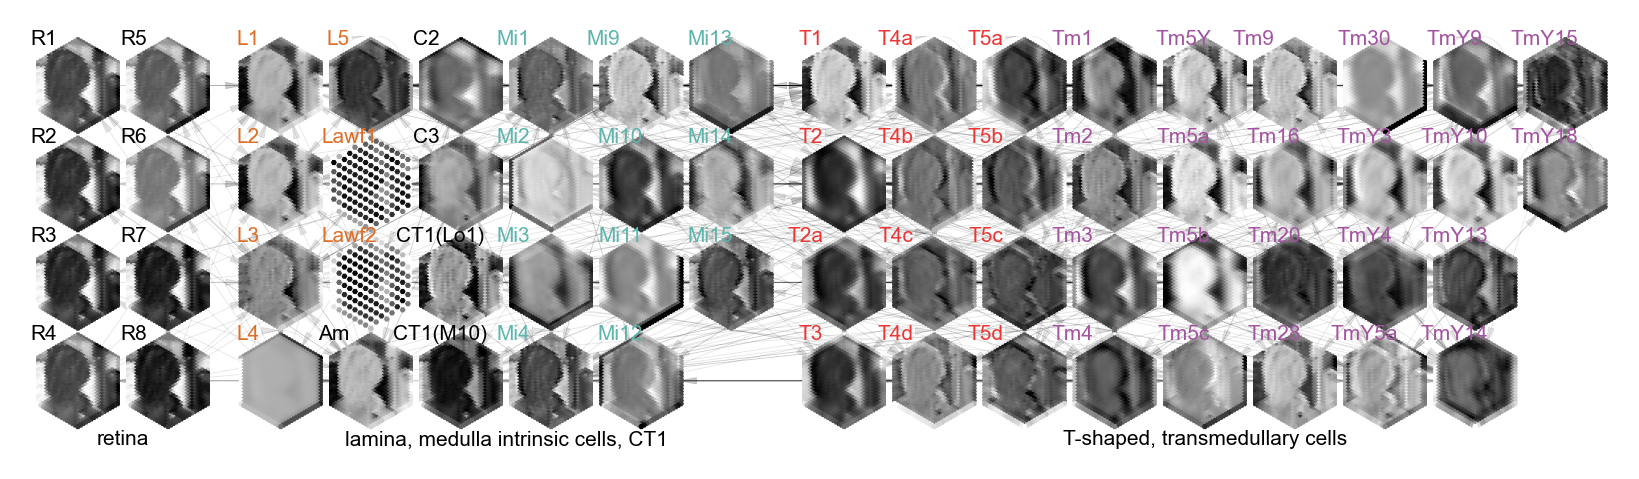

In [231]:
wnf = WholeNetworkFigure(ctome)
wnf.init_figure(
    figsize=(5.250, 1.3125),
    decoder_box=False,
    cell_type_labels=False,
    fontsize=5,
    add_graph_kwargs={
        "constant_edge_width": 0.2,
        "edge_width": 0.15, # this scales edges relative to each other
        "constant_edge_color": "k",
        "edge_alpha": 0.1,
        "nx_kwargs": {"min_source_margin": 0,
                      "min_target_margin": 5,
                      "selfloop_x0": 0,
                      "selfloop_y0": 0,
                      "selfloop_h_shift": 0.025,
                      "selfloop_v_shift": 0.1275},
    },
    network_layout_axes_kwargs={
        "types_per_column": 4,
        "region_spacing": 1.25,
        "wspace": 0.0,
    },
)

for i, cell_type in enumerate(wnf.layout.keys()):
#     if cell_type not in ["T4a"]: #["R1", "R5", "L1", "T4a"]:
#         continue
    ax = wnf.axes[i]
    cell_type = original_cell_type(cell_type)
    u = nodes[nodes.type == cell_type].u.values
    v = nodes[nodes.type == cell_type].v.values
    dvs.plots.hex_scatter(
        u,
        v,
        layer_activity[cell_type][batch_sample, frame],
        fig=wnf.fig,
        ax=ax,
        label=f"{cell_type}",
        label_color=cell_type_colors[cell_type],
        cmap=plt.cm.binary_r,
        cbar=False,
        fontsize=5,
        fill=True,
        labelxy="auto"
    )
    dvs.plots.plt_utils.patch_type_texts(ax)
    
    (xmin, ymin, xmax, ymax) = ax.dataLim.extents
    ax.set_xlim(plt_utils.get_lims((xmin, xmax), 0.01))
    ax.set_ylim(plt_utils.get_lims((ymin, ymax), 0.02))

In [232]:
wnf.fig.savefig(dvs.figure_dir / "network_graph_sintel_v7.pdf", dpi=600,
            transparent=True, bbox_inches='tight')

[2024-07-26 16:22:15] [__init__.py:3245] maxp pruned
[2024-07-26 16:22:15] [__init__.py:3229] LTSH dropped
[2024-07-26 16:22:15] [__init__.py:3245] cmap pruned
[2024-07-26 16:22:15] [__init__.py:3245] kern pruned
[2024-07-26 16:22:15] [__init__.py:3245] post pruned
[2024-07-26 16:22:15] [__init__.py:3229] PCLT dropped
[2024-07-26 16:22:15] [__init__.py:3229] JSTF dropped
[2024-07-26 16:22:15] [__init__.py:3229] DSIG dropped
[2024-07-26 16:22:15] [__init__.py:3245] GSUB pruned
[2024-07-26 16:22:15] [__init__.py:3245] glyf pruned
[2024-07-26 16:22:15] [__init__.py:3285] Added gid0 to subset
[2024-07-26 16:22:15] [__init__.py:3293] Added first four glyphs to subset
[2024-07-26 16:22:15] [__init__.py:3297] Closing glyph list over 'GSUB': 44 glyphs before
[2024-07-26 16:22:15] [__init__.py:452] Glyph names: ['.notdef', '.null', 'A', 'C', 'L', 'M', 'R', 'T', 'Y', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o'

In [219]:
wnf.fig.savefig(dvs.figure_dir / "network_graph_sintel_v6.pdf", dpi=600,
            transparent=True, bbox_inches='tight')

[2024-07-26 16:07:38] [__init__.py:3245] maxp pruned
[2024-07-26 16:07:38] [__init__.py:3229] LTSH dropped
[2024-07-26 16:07:38] [__init__.py:3245] cmap pruned
[2024-07-26 16:07:38] [__init__.py:3245] kern pruned
[2024-07-26 16:07:38] [__init__.py:3245] post pruned
[2024-07-26 16:07:38] [__init__.py:3229] PCLT dropped
[2024-07-26 16:07:38] [__init__.py:3229] JSTF dropped
[2024-07-26 16:07:38] [__init__.py:3229] DSIG dropped
[2024-07-26 16:07:38] [__init__.py:3245] GSUB pruned
[2024-07-26 16:07:38] [__init__.py:3245] glyf pruned
[2024-07-26 16:07:38] [__init__.py:3285] Added gid0 to subset
[2024-07-26 16:07:38] [__init__.py:3293] Added first four glyphs to subset
[2024-07-26 16:07:38] [__init__.py:3297] Closing glyph list over 'GSUB': 44 glyphs before
[2024-07-26 16:07:38] [__init__.py:452] Glyph names: ['.notdef', '.null', 'A', 'C', 'L', 'M', 'R', 'T', 'Y', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o'

/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(new)
/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:181: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(new)


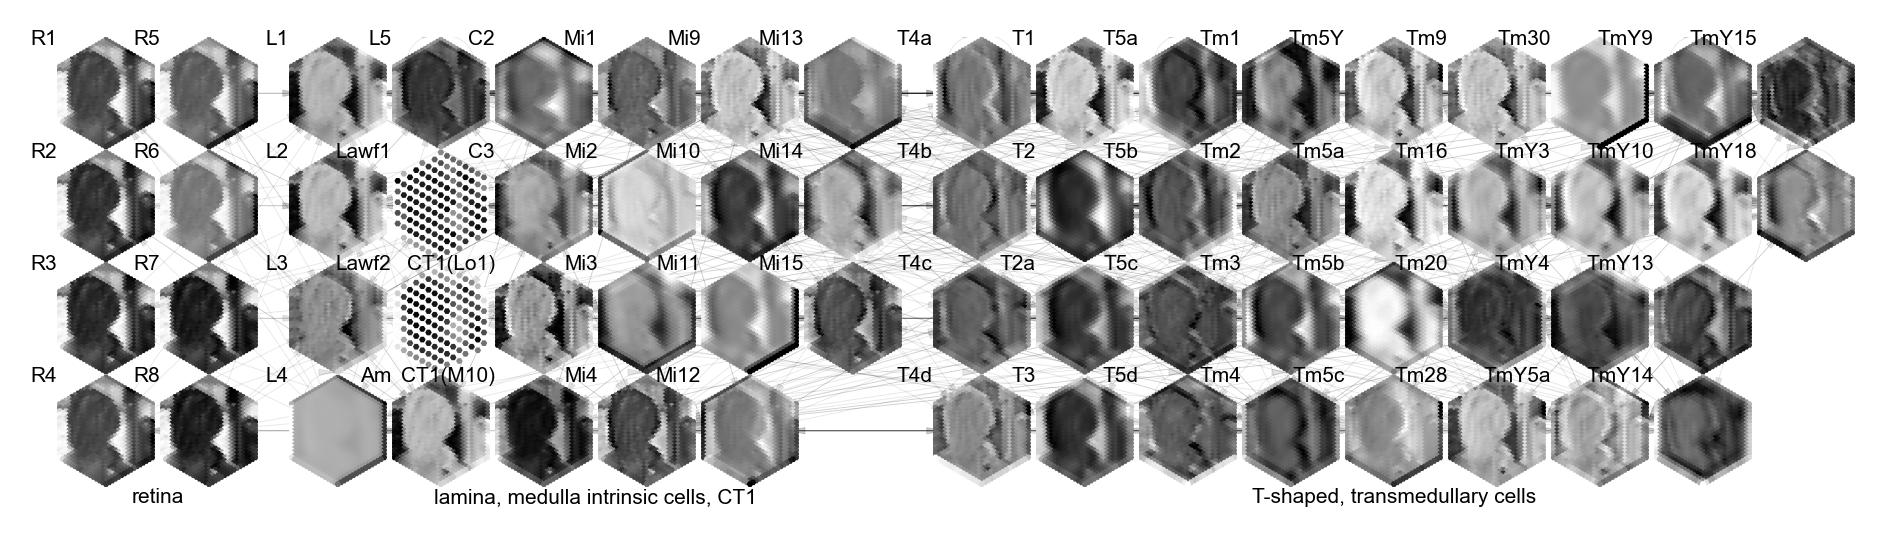

In [179]:
wnf = WholeNetworkFigure(ctome)
wnf.layout = update_layout
wnf.init_figure(
    figsize=(6.0, 1.5),
    decoder_box=False,
    fontsize=5,
    add_graph_kwargs={
        "constant_edge_width": 0.2,
        "edge_width": 0.15, # this scales edges relative to each other
        "constant_edge_color": "k",
        "edge_alpha": 0.1,
        "nx_kwargs": {"min_source_margin": 0,
                      "min_target_margin": 5,
                      "selfloop_x0": 0,
                      "selfloop_y0": 0,
                      "selfloop_h_shift": 0.025,
                      "selfloop_v_shift": 0.13},
    },
    network_layout_axes_kwargs={
        "types_per_column": 4,
        "region_spacing": 1.25,
        "wspace": 0.0,
    },
)

for i, cell_type in enumerate(wnf.layout.keys()):
#     if cell_type not in ["T4a"]: #["R1", "R5", "L1", "T4a"]:
#         continue
    cell_type = original_cell_type(cell_type)
    u = nodes[nodes.type == cell_type].u.values
    v = nodes[nodes.type == cell_type].v.values
    dvs.plots.hex_scatter(
        u,
        v,
        layer_activity[cell_type][batch_sample, frame],
        fig=wnf.fig,
        ax=wnf.axes[i],
        #                               label=f"{node_type}",
        cmap=plt.cm.binary_r,
        cbar=False,
        fontsize=5,
        fill=True,
        labelxy=(-0.1, 1.0),
    )
    dvs.plots.plt_utils.patch_type_texts(axes[i])

/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(new)
/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:181: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(new)


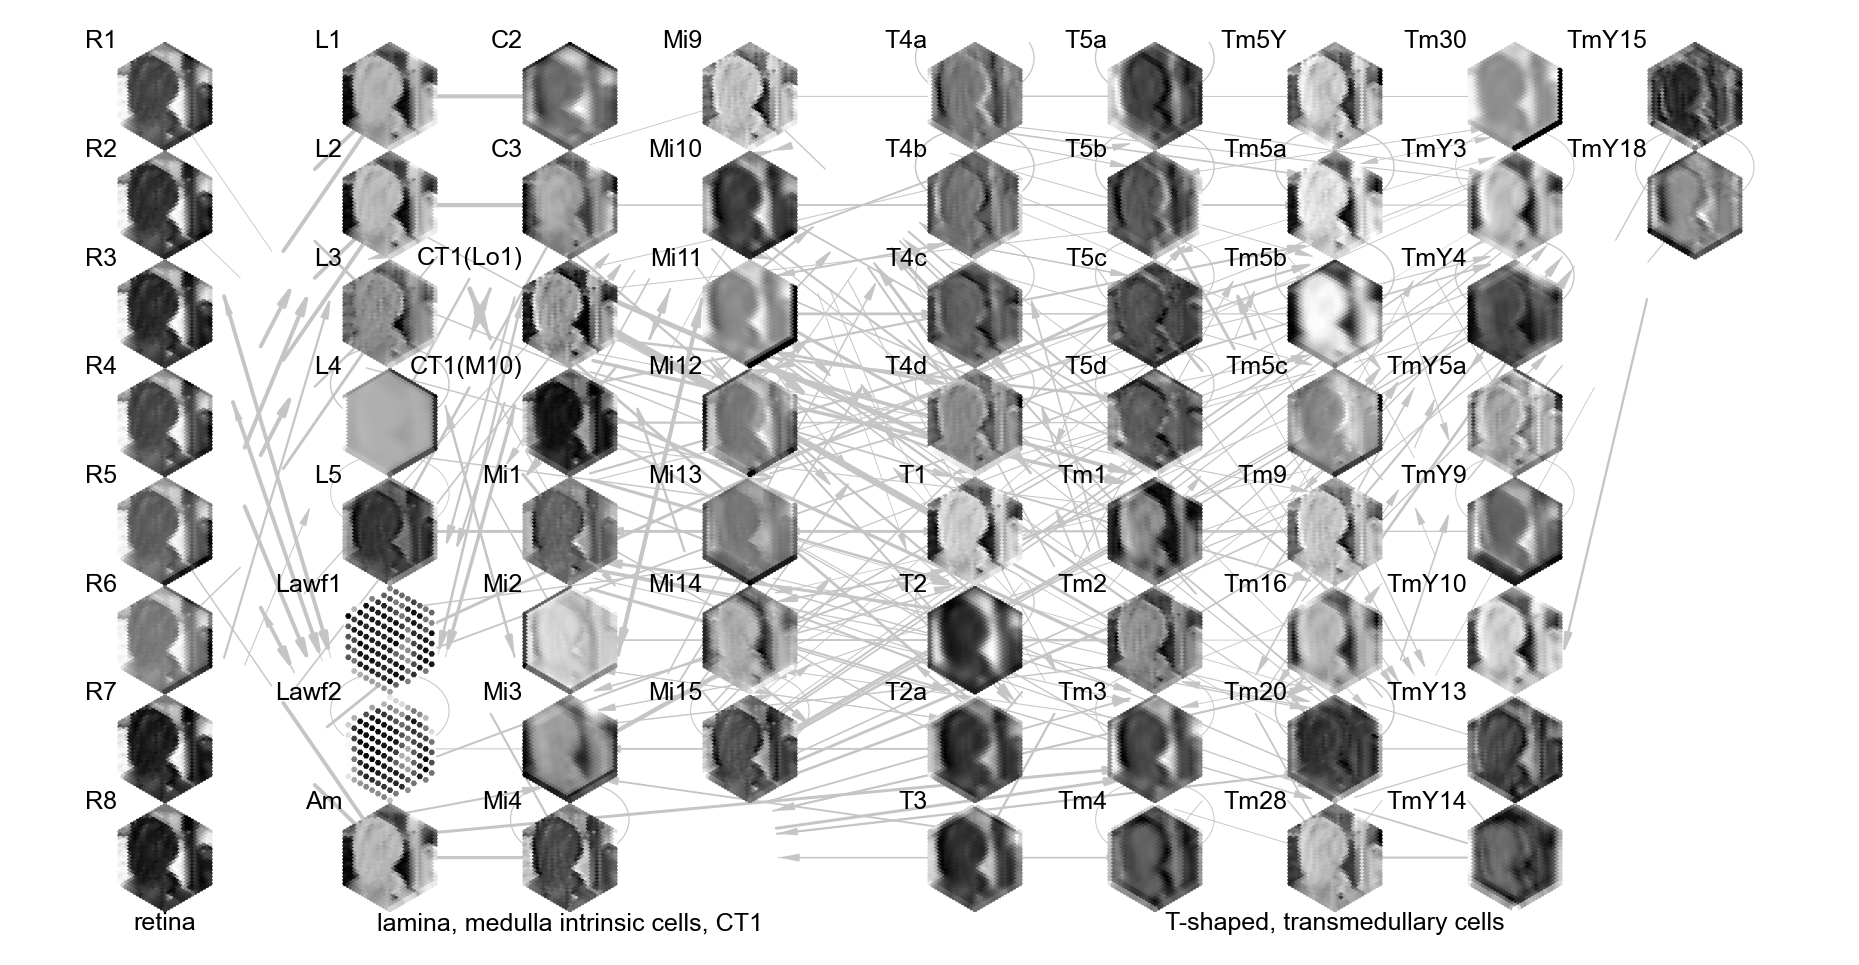

In [80]:
wnf = WholeNetworkFigure(ctome)
wnf.layout = update_layout
wnf.init_figure(figsize=(6., 2.9), 
                decoder_box=False,
                fontsize=5,
                add_graph_kwargs={"constant_edge_width":None, "edge_width": 0.2, "edge_alpha": 1.0,
                                 "nx_kwargs": {"min_source_margin": 50,
                                               "min_target_margin": 50}},
                network_layout_axes_kwargs={"region_spacing": 1.25, "wspace": -0.5})


for i, cell_type in enumerate(wnf.layout.keys()):
    cell_type = original_cell_type(cell_type)
    u = nodes[nodes.type == cell_type].u.values
    v = nodes[nodes.type == cell_type].v.values
    dvs.plots.hex_scatter(u, v, 
                          layer_activity[cell_type][batch_sample, frame],
                            fig=wnf.fig, ax=wnf.axes[i], 
#                               label=f"{node_type}",
                                cmap=plt.cm.binary_r,cbar=False,
                                fontsize=5, fill=True, labelxy=(-0.1, 1.0))
    dvs.plots.plt_utils.patch_type_texts(axes[i])
    if cell_type == "L5":
        break

/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(new)
/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/plots/decoration.py:181: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(new)


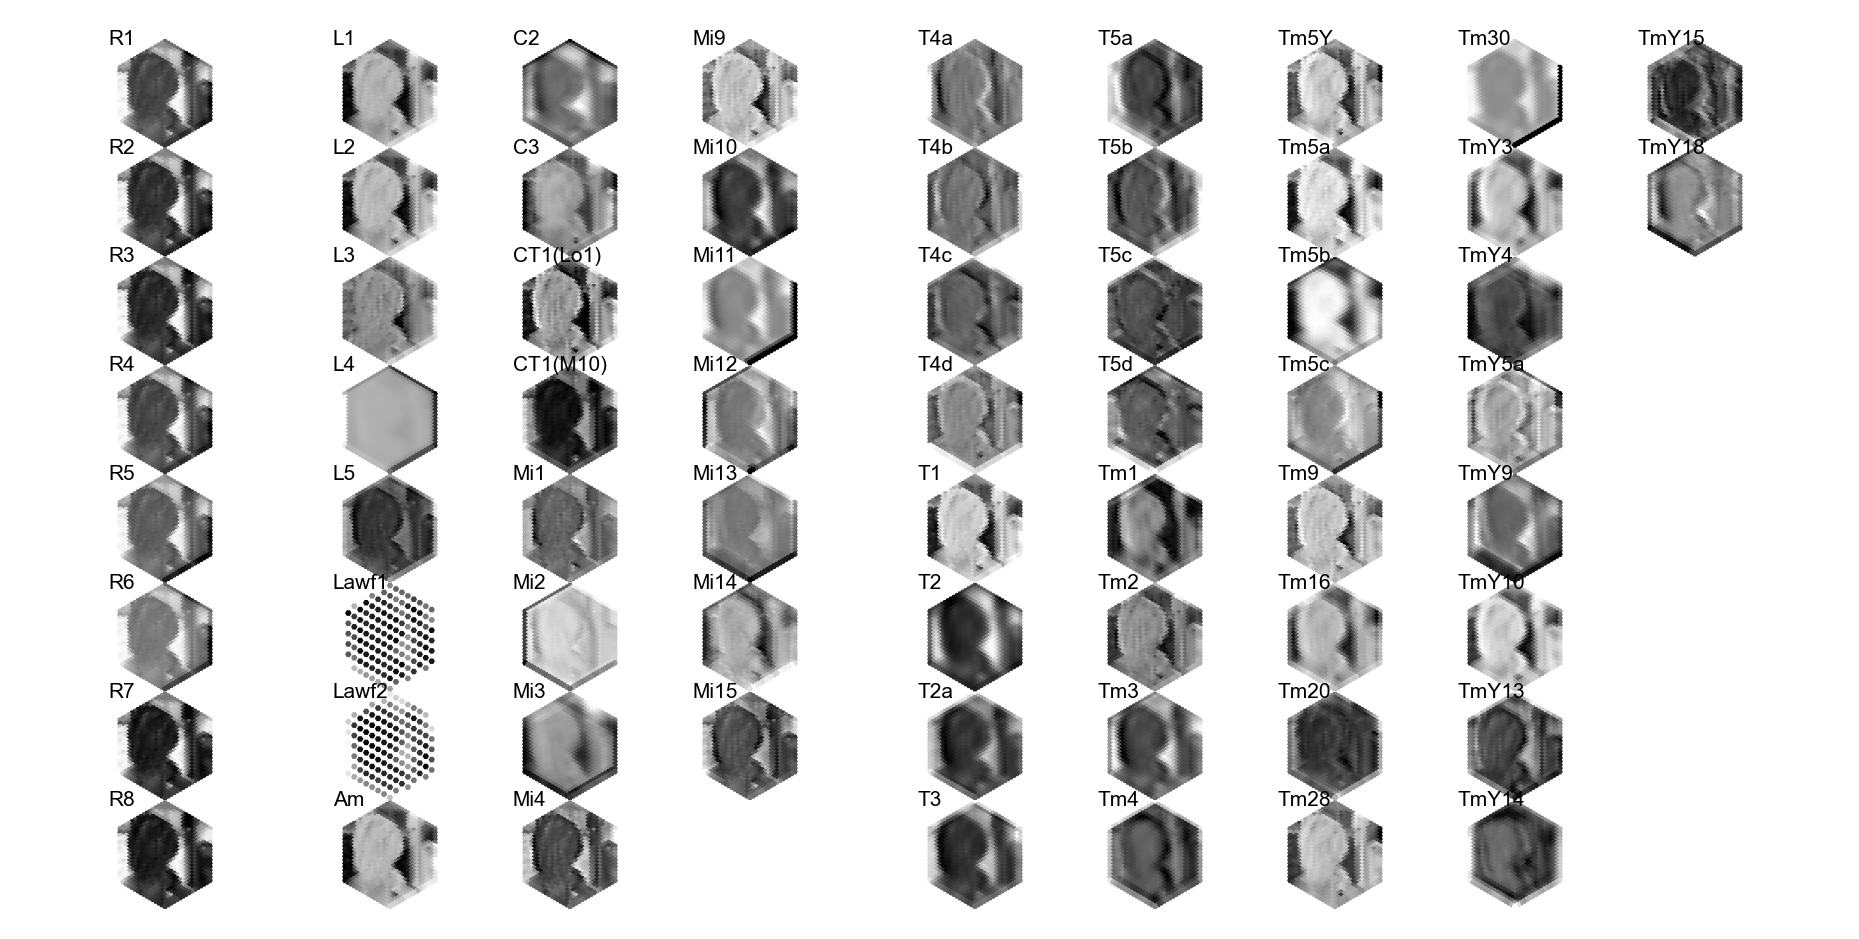

In [8]:
nodes = nnv.nodes.to_df()
edges = nnv.edges.to_df()

fig, axes = dvs.plots.plots._network_graph_ax_scatter(list(layout.keys()), 
                                                                 nodes,
                                                                 edges,
                                                                 layout, 
                                                                 figsize=(6., 2.9),
                                                             edge_color_key=None, # "weight_prior"
                                                    edge_alpha=0.1,
                                                    edge_width=0.2,
                                                    region_spacing=1.25, wspace=-0.5)


layer_activity = dvs.plots.utils.LayerActivity(nnv.tnn.training_v2.network_states.nodes.activity[:],
                                               nnv.ctome, 
                                               keepref=True)
u, v = dvs.utils.get_hex_coords(15)
for i, node_type in enumerate(layout.keys()):
    u = nodes[nodes.type == node_type].u.values
    v = nodes[nodes.type == node_type].v.values
    dvs.plots.hex_scatter(u, v, layer_activity[node_type][batch_sample, frame],
                                fig=fig, ax=axes[i], label=f"{node_type}",
                                cmap=plt.cm.binary_r,cbar=False,
                                fontsize=5, fill=True, labelxy=(-0.1, 1.0))
    dvs.plots.plt_utils.patch_type_texts(axes[i])

In [155]:
## don't overwrite network_graph_sintel.pdf or fix it afterwards in adobe acrobat by saving as pdf/x
fig.savefig(dvs.figure_01_fly_visual_system / "network_graph_sintel_v5.pdf", dpi=600,
            transparent=True, bbox_inches='tight')

### miniature version

In [12]:
mpl.rcParams['figure.dpi'] = 600

In [5]:
figsize_inch = dvs.plots.cm_to_inch(2.8, 1.3)

In [43]:
frame = -1
batch_sample = 1 

In [15]:
validation_subwrap = "original_validation_v2"
validation_loss_fn = "epe"

movingedge_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/moving_edges"
flash_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/flashes"

naturalistic_responses_wrap = "naturalistic_responses_v3"
naturalistic_responses_wrap = (
    f"{validation_subwrap}/{validation_loss_fn}_based/{naturalistic_responses_wrap}"
)

In [16]:
network = nnv.init_network(validation_subwrap=validation_subwrap, validation_loss_name=validation_loss_fn)

02/13/2023 12:18:25 PM - clamping has no effect, I will remove it from param_config  to make sure it's not used downstream. I would implement a new Parameter class if I'd like to experiment with different parameter ranges for the synapse counts to keep things simple.
02/13/2023 12:18:29 PM - Initialized network with 734 parameters.
02/13/2023 12:18:29 PM - Internal noise described by sigma=0.0.
02/13/2023 12:18:29 PM - Checkpoint /nrs/turaga/lappalainenj/dvs-sim/data/experiments/flow/0092/000/chkpts/chkpt_00060 loaded.
02/13/2023 12:18:29 PM - Recovered network state.


In [18]:
dataset = dvs.datasets.MultiTaskSintel(**nnv.tnn.spec.task.dataset)

In [19]:
dataset.augment = False
dataset.dt = 1/50

In [20]:
dataset.arg_df

index  original_index                           name  frames
0       0               0   sequence_00_alley_1_split_00      50
1       1               0   sequence_00_alley_1_split_01      50
2       2               0   sequence_00_alley_1_split_02      50
3       3               1   sequence_01_alley_2_split_00      50
4       4               1   sequence_01_alley_2_split_01      50
..    ...             ...                            ...     ...
64     64              21  sequence_21_temple_2_split_01      50
65     65              21  sequence_21_temple_2_split_02      50
66     66              22  sequence_22_temple_3_split_00      50
67     67              22  sequence_22_temple_3_split_01      50
68     68              22  sequence_22_temple_3_split_02      50

[69 rows x 4 columns]

In [21]:
network.stimulus_response??

In [28]:
activity, stim = list(network.stimulus_response(dataset, 1/50, indices=[1]))[0]

02/13/2023 12:21:48 PM - Computing 1 stimulus responses.


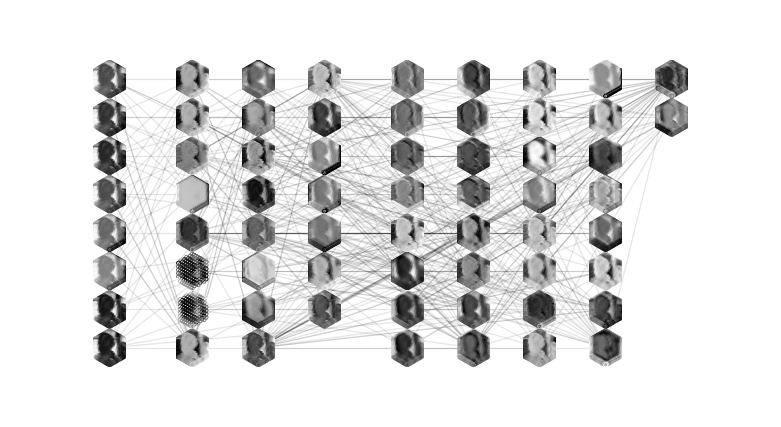

In [52]:
nodes = nnv.nodes.to_df()
edges = nnv.edges.to_df()

fig, axes = dvs.plots.plots._network_graph_ax_scatter(
    list(layout.keys()),
    nodes,
    edges,
    layout,
    figsize=figsize_inch,
    edge_color_key=None,  # "weight_prior"
    edge_alpha=0.1,
    edge_width=0.2,
    constant_edge_color="black", #"#C5C5C5",
#     constant_edge_color="#C5C5C5",
    constant_edge_width=0.15, 
    region_spacing=1.25, wspace=-0.5
    
)


layer_activity = dvs.plots.utils.LayerActivity(
    activity.squeeze(), nnv.ctome, keepref=True
)
u, v = dvs.utils.get_hex_coords(15)
for i, node_type in enumerate(layout.keys()):
    u = nodes[nodes.type == node_type].u.values
    v = nodes[nodes.type == node_type].v.values
    dvs.plots.hex_scatter(
        u,
        v,
        layer_activity[node_type][frame],
        fig=fig,
        ax=axes[i],
#         label=f"{node_type}",
        cmap=plt.cm.binary_r,
        cbar=False,
        fontsize=5,
        fill=True,
        labelxy=(-0.1, 1.0),
#         max_extent=5
        radius=0.5
    )
#     dvs.plots.plt_utils.patch_type_texts(axes[i])

In [53]:
fig.savefig(dvs.figure_01_fly_visual_system / "network_graph_sintel_tiny.png", dpi=600,
            transparent=True, bbox_inches='tight')

## flow

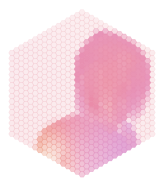

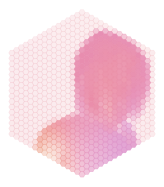

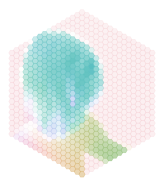

In [168]:
for frame in [0, 1, -1]:
    dvs.plots.quick_hex_flow(
        nnv.tnn.training.y.flow[batch_sample, frame],
        cwheel=False,
        cwheelradius=0.2,
        cwheelpos="southeast",
        cwheellabelpad=-3,
        figsize=[3, 3],
    )
#     plt.savefig(dvs.figure_01_fly_visual_system / f"y_{frame}.pdf", bbox_inches="tight", transparent=True)